In [159]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [160]:
data = pd.read_csv('iris.csv')
data.head(10)

,0,1,2,3,y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [161]:
data.describe()

,0,1,2,3,y
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [162]:
x=data.drop(['y'],axis='columns')
y=data.y

In [163]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [164]:
model1 = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=6)
model2 = DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=4)
model3 = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=3)
model4 = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=4)
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='random')

In [165]:
print(f'model1 -> {model1.score(x_test,y_test)}')
print(f'model2 -> {model2.score(x_test,y_test)}')
print(f'model3 -> {model3.score(x_test,y_test)}')
print(f'model4 -> {model4.score(x_test,y_test)}')

model1 -> 0.9333333333333333
model2 -> 0.9666666666666667
model3 -> 0.9666666666666667
model4 -> 0.8666666666666667


## Grid Search

In [166]:
model = DecisionTreeClassifier()
optimiser = {
    'criterion' : ('gini','entropy'),
    'splitter' : ('best','random'),
    'max_depth' : list(range(2,6))
}
gs = GridSearchCV(model,optimiser)

In [167]:
gs.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5],
                         'splitter': ('best', 'random')})

In [168]:
gs.cv_results_['params']

[{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'},
 {'criterion': 'gini', 'max_depth': 2, 'splitter': 'random'},
 {'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'},
 {'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'},
 {'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'},
 {'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'},
 {'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'},
 {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'},
 {'criterion': 'entropy', 'max_depth': 2, 'splitter': 'best'},
 {'criterion': 'entropy', 'max_depth': 2, 'splitter': 'random'},
 {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'},
 {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'},
 {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'},
 {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'},
 {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'},
 {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}]

In [169]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}

In [170]:
score=gs.cv_results_['mean_test_score']
score

array([0.96666667, 0.8       , 0.95833333, 0.90833333, 0.975     ,
       0.93333333, 0.96666667, 0.95      , 0.96666667, 0.93333333,
       0.95833333, 0.83333333, 0.975     , 0.94166667, 0.975     ,
       0.95833333])

In [171]:
score[np.argmax(score)]

0.975

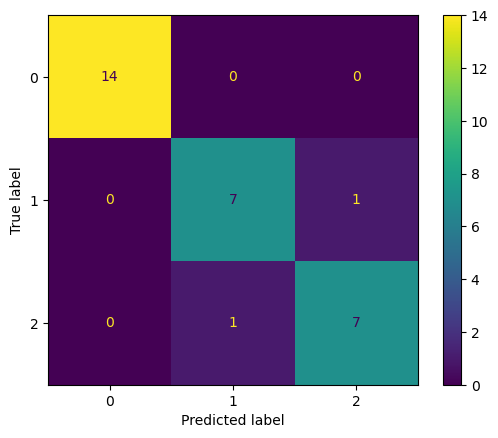

In [172]:
matrix = confusion_matrix(gs.predict(x_test),y_test)
cmd = ConfusionMatrixDisplay(matrix, display_labels=gs.classes_)
cmd.plot()

## Random Search

In [173]:
rs = RandomizedSearchCV(model,optimiser)
rs.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': [2, 3, 4, 5],
                                        'splitter': ('best', 'random')})

In [174]:
rs.cv_results_['params']

[{'splitter': 'best', 'max_depth': 4, 'criterion': 'gini'},
 {'splitter': 'best', 'max_depth': 4, 'criterion': 'entropy'},
 {'splitter': 'best', 'max_depth': 3, 'criterion': 'entropy'},
 {'splitter': 'random', 'max_depth': 4, 'criterion': 'gini'},
 {'splitter': 'random', 'max_depth': 2, 'criterion': 'entropy'},
 {'splitter': 'random', 'max_depth': 5, 'criterion': 'gini'},
 {'splitter': 'best', 'max_depth': 3, 'criterion': 'gini'},
 {'splitter': 'random', 'max_depth': 3, 'criterion': 'entropy'},
 {'splitter': 'random', 'max_depth': 4, 'criterion': 'entropy'},
 {'splitter': 'random', 'max_depth': 2, 'criterion': 'gini'}]

In [175]:
rs.best_params_

{'splitter': 'best', 'max_depth': 4, 'criterion': 'gini'}

In [176]:
score = rs.cv_results_['mean_test_score']
score

array([0.975     , 0.975     , 0.95833333, 0.96666667, 0.90833333,
       0.96666667, 0.95833333, 0.86666667, 0.89166667, 0.85      ])

In [177]:
score[np.argmax(score)]

0.975

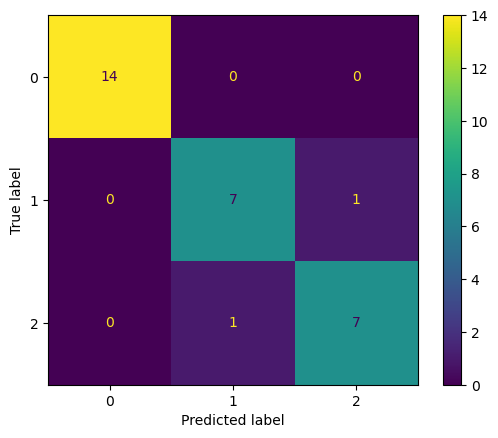

In [178]:
matrix = confusion_matrix(rs.predict(x_test),y_test)
cmd2= ConfusionMatrixDisplay(matrix, display_labels=rs.classes_)
cmd2.plot()